In [76]:
library(tidyverse)

Q.1
* We have use the following dataset in the course material to generate two datasets form the same distribution but which have different sample means
  * here I am generating only 5 samples, insteaf of the 40 generated in the course material

In [77]:
set.seed(110)
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(5, 10, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)
complete_data

measure,site_name
<dbl>,<chr>
10.291195,Site 1
11.388863,Site 1
10.649010,Site 1
11.477876,Site 1
10.438720,Site 1
10.522318,Site 2
9.955392,Site 2
11.484413,Site 2
8.408989,Site 2


In [30]:
data_1 = tibble(measure=rnorm(5, 10, 1))
data_1$site_name <- 'Site 1'
print(data_1)

# A tibble: 5 × 2
  measure site_name
    <dbl> <chr>    
1    9.53 Site 1   
2    9.32 Site 1   
3   11.2  Site 1   
4    8.93 Site 1   
5    9.88 Site 1   


In [ ]:
* I compute the mean of the dataset above using the following code:
  * feel free to deconstruct the code to see what each chunk does.


In [15]:
mean(complete_data[complete_data$site_name == "Site 1", ]$measure)
mean(complete_data[complete_data$site_name == "Site 2", ]$measure)

[1] 10.84913

[1] 10.11935

* Use the `tapply` function instead of the code above to compute the means samples from "Site 1" and those from site 2
  * See tapply for help if needed

In [22]:
# Write your code here

tapply(complete_data$measure, complete_data$site_name, mean)

Site 1   Site 2 
10.84913 10.11935

Q.2 
Recall that the test conducted on full version of data_1 and data_2 led us to conlclude that the difference between the two datasets is statistically significant, when both samples were in fact from the same distirbution  $\mathcal{N}(\mu=10, \sigma=1)$

* Use the boostrapping-based test covered in class to assess whether you arrive at the same conclusion

* You can generate the data using the code snippet below



In [78]:

data_1 = tibble(measure=rnorm(40, 10, 1))
data_1$site_name <- 'Site 1'
data_2 = tibble(measure=rnorm(40, 13, 1))
data_2$site_name <- 'Site 2'
complete_data = rbind(data_1, data_2)


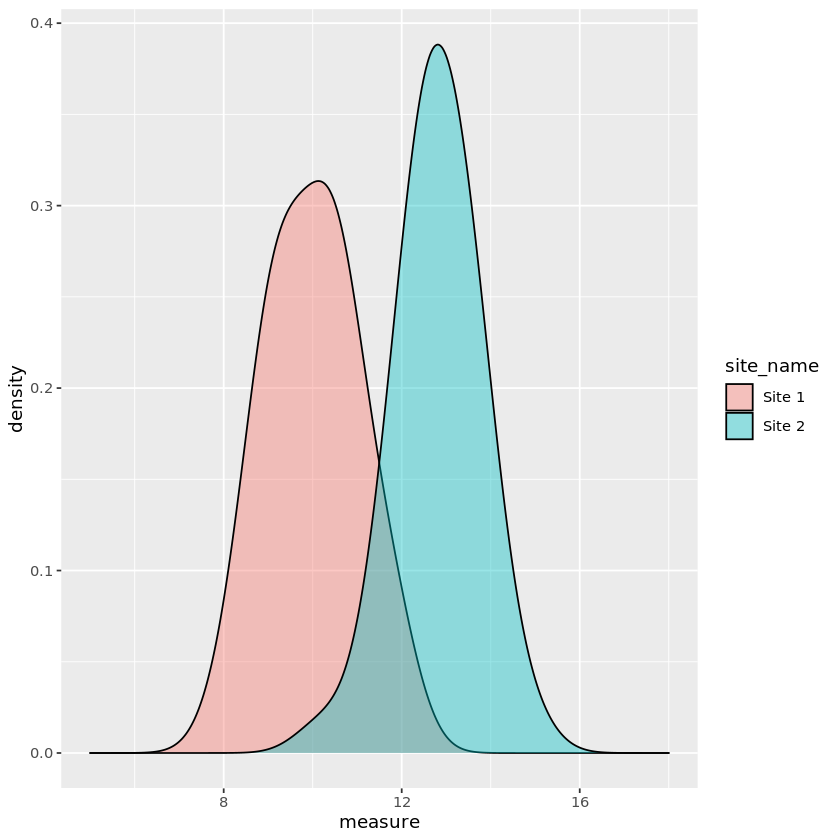

In [79]:
ggplot(complete_data, aes(x=measure, fill = site_name)) + 
  geom_density(alpha = 0.4, bw =0.60) + 
  xlim(5,18)


In [80]:
bootstrap_concat = function(data_1, data_2){
  
  concat_data = c(data_1, data_2)
  len_concat_data = length(concat_data)
  
  len_data_1 = length(data_1)    
  shuffled_data = sample(concat_data)
  new_data_1 = shuffled_data[1:len_data_1]
  new_data_2 = shuffled_data[(len_data_1+1):len_concat_data]
  mean(new_data_1) - mean(new_data_2)
}

In [81]:
set.seed(110)
bootstrap_concat(data_1$measure, data_2$measure)
mean_under_null = replicate(1000, bootstrap_concat(data_1$measure, data_2$measure))


[1] -0.08046352

In [82]:
set.seed(110)
observed_value = mean(data_1$measure) - mean(data_2$measure)
observed_value


[1] -2.804118

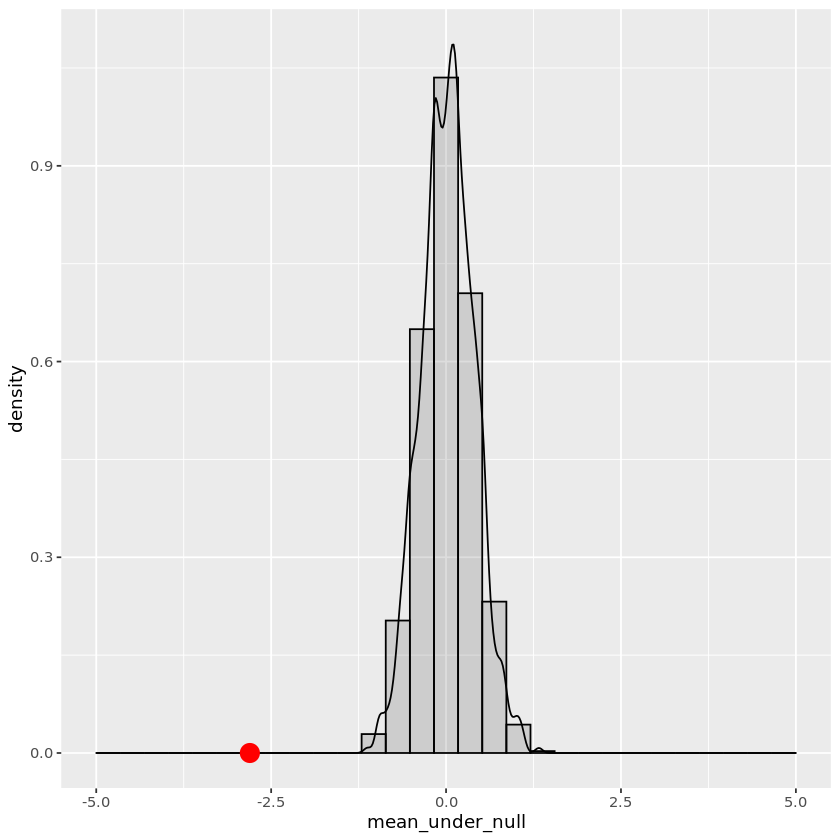

In [83]:
ggplot()+
  geom_histogram(aes(mean_under_null, y=..density..), bins =30, alpha=0.2, color="black") + 
  geom_density(aes(mean_under_null), bw=0.05, size=0.5) + 
  xlim(-5, 5) + 
  geom_point(aes(observed_value, 0), color="red", size=5)


In [43]:
sum(mean_under_null <= observed_value) / length(mean_under_null)


[1] 0

Q.3 

* The proportion of the of _P. lobata_, _M. capitata_ and _P. mendrina_ at a site X are c(0.60, 0.19, 0.21).
* You surveyed a site Y with somewhat differentenvironmental conditions and obtains the following proportions for the same coral (0.61, 0.19, 0.20). Use the multinomial non-parameteric hypotheses test to assess the proportions obtained at sites X and Y are statistically differnet



In [12]:
coral_sp = c("P. lobata","P. lobata", "M. capitata", "M. capitata", "P. mendrina","P. mendrina")
ratios =c(0.60, 0.61, 0.19, 0.19, 0.21, 0.20)
coral_proportions = tibble(coral_sp, ratios)

In [13]:
tibble(coral_proportions)

coral_sp,ratios
<chr>,<dbl>
P. lobata,0.60
P. lobata,0.61
M. capitata,0.19
M. capitata,0.19
P. mendrina,0.21
P. mendrina,0.20


In [21]:
coral_multinom = function(){
  true_proportions = c(0.60,0.19,0.21)
  sample_proportions = rmultinom(1, 200, prob=c(0.61,0.19,0.20))/200
  sample_tvd = sum(abs(true_proportions- sample_proportions))/2
  sample_tvd
    
}
coral_multinom()

[1] 0.095

In [23]:
subtract_abs = function(x){
  abs(x[1] - x[2])
}



In [26]:
sum(tapply(coral_proportions$ratios, coral_proportions$coral_sp, subtract_abs))/2

[1] 0.01

In [17]:
observed_stat = sum(tapply(coral_proportions$ratios, coral_proportions$coral_sp, subtract_abs))/2
tvds = replicate(1000, coral_multinom())
p_value = sum(tvds > observed_stat)/length(tvds)
p_value

[1] 0.95

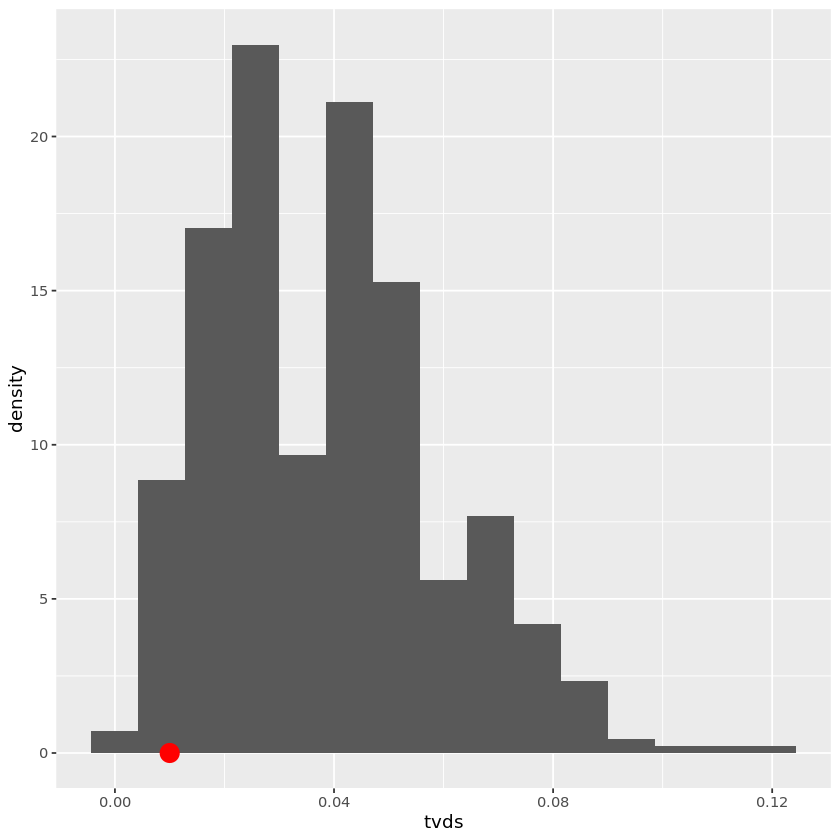

In [27]:
ggplot()+ 
  geom_histogram(aes(tvds, ..density..), bins = 15) +
  geom_point(aes(observed_stat, 0), size=5, color="red")


In [84]:
sum(tvds <= observed_stat) / length(tvds)

[1] 0.05